# Coursework 1 - Decision Trees Learning and K-Nearest Neighbors

### Candidate Number: 670028137

## Summary
In this coursework, your task is to develop a machine learning classifier for predicting female patients that at high risk of Diabetes. Your model is to support clinicians in identifying patients who are likely to have “Diabetes”. The dataset has 9 attributes in total including the “target/label” attribute. The full dataset is available on ELE under assessment coursework 1. The dataset consists of the following: 


## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn import preprocessing
%matplotlib inline
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset 
                 # In the file, attributes are separated by ,

In [2]:
dia_all.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


## Seperate the inpout (attributes) from target (label)

In [3]:
sourcevars = dia_all.iloc[:,:-1] #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

In [4]:
sourcevars.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
targetvar.head()

,class
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


# Your answers
Please clearly highlight each task.

   # Task 1: Exploratory Data Analysis

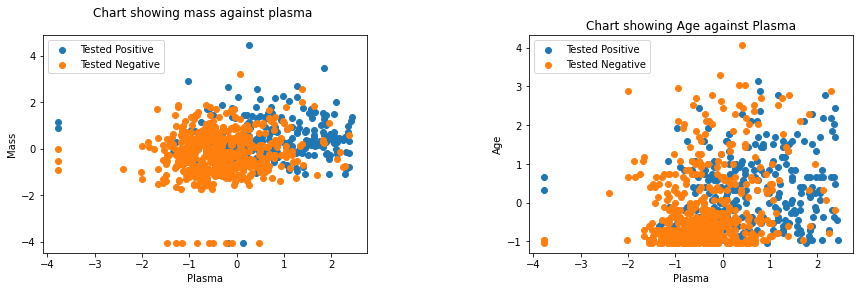

In [6]:
# Replace strings with numbers to allow standardisation
dia_all['class'] = dia_all['class'].replace('tested_positive', 1)
dia_all['class'] = dia_all['class'].replace('tested_negative', 0)

# Standardise values
arr = dia_all.values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(arr)
df = pd.DataFrame(x_scaled, columns=dia_all.columns)

positive = df['class'][0]
negative = df['class'][1]
# Draw charts
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.suptitle("Chart showing mass against plasma ")
plt.title('Chart showing Age against Plasma')


axes[0].scatter(df['plas'][df['class']==positive], df['mass'][df['class']==positive], label="Tested Positive")
axes[0].scatter(df['plas'][df['class']==negative], df['mass'][df['class']==negative], label="Tested Negative")
axes[0].legend()
axes[0].set_xlabel('Plasma')
axes[0].set_ylabel('Mass')

axes[1].scatter(df['plas'][df['class']==positive], df['age'][df['class']==positive], label="Tested Positive")
axes[1].scatter(df['plas'][df['class']==negative], df['age'][df['class']==negative], label="Tested Negative")
axes[1].legend()
axes[1].set_xlabel('Plasma')
axes[1].set_ylabel('Age')

fig.subplots_adjust(wspace=0.5, right=2)

In [7]:
# Somewhat predictibily, as age increases, so does the number of pregnancies
# sourcevars['age'].corr(sourcevars['preg'])asdf
sourcevars.corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


# Task 2 [.....]

In [327]:
from sklearn.model_selection import train_test_split

clf = tree.DecisionTreeClassifier(criterion="entropy")
X_train, X_test, y_train, y_test = train_test_split(sourcevars, targetvar, train_size=0.7)
clf = clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)
y_test['predictions'] = y_predict

print(str(len(y_test[y_test['class'] == y_test['predictions']]) / len(y_test))+"%")

0.7056277056277056%


<ipython-input-327-a080af24b6c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predictions'] = y_predict


# Reflection

write your reflection here